In [83]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Importing the data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [85]:

print(f"X Train shape {X_train.shape}")
print(f"y Train shape {y_train.shape}")
print(f"X Test shape {X_test.shape}")
print(f"y Test shape {y_test.shape}")


X Train shape (50000, 32, 32, 3)
y Train shape (50000, 1)
X Test shape (10000, 32, 32, 3)
y Test shape (10000, 1)


In [86]:
# The output classes of the CIFAR -10 Dataset according to https://www.cs.toronto.edu/~kriz/cifar.html
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [87]:
# Data normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

# One - hot encoding the labels / output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [88]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
# y_test = y_test.reshape(y_test.shape[0])

In [93]:
def plotData(X,y,index):
  plt.figure(figsize=(10,2))
  print(y[index])
  label_index = np.argmax(y[index])
  plt.imshow(X[index])
  plt.xlabel(classes[label_index])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


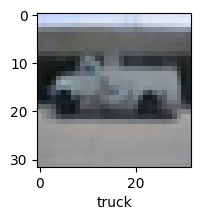

In [97]:
plotData(X_train, y_train ,110)

In [100]:
# ANN
ann = models.Sequential(
    [
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10,activation='sigmoid')
    ]
)
ann.compile(optimizer='SGD' , loss='categorical_crossentropy' ,metrics=['accuracy'])
# sparse_categorical_crossentropy - when the output is a single values like category - 8
#categorical_crossentrophy - when the output is one hot encoded

In [182]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_4 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [101]:
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8070 - accuracy: 0.3561
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6166 - accuracy: 0.4316
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5405 - accuracy: 0.4582
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4801 - accuracy: 0.4782
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4289 - accuracy: 0.4959
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3865 - accuracy: 0.5132
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3481 - accuracy: 0.5252
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3164 - accuracy: 0.5367
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2838 - accuracy: 0.5484
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.251

In [112]:
# Accuracy score of the ANN model
# Evaluate on test data

ann_results = ann.evaluate(X_test ,y_test)

print(f"Loss of the ANN model {ann_results[0]}")
print(f"Accuracy of the ANN model {ann_results[1]}")

# from sklearn.metrics import accuracy_score
# y_pred_ann = ann.predict(X_test)
# accuracy_score(y_test, y_pred_ann , normalize=True)


313/313 [==============================] - 1s 2ms/step - loss: 1.3326 - accuracy: 0.5277
Loss of the ANN model 1.3325501680374146
Accuracy of the ANN model 0.5277000069618225


In [144]:
# CNN

cnn = models.Sequential(
    [
        layers.Conv2D(filters=32 , kernel_size= (3,3) , activation ='relu' ,input_shape=(32,32,3) ,padding='same'),
        layers.BatchNormalization(),
        

        layers.Conv2D(filters=32 , kernel_size=(3,3), activation='relu' ,padding='same'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(filters=64 , kernel_size= (3,3) , activation ='relu' ),
        layers.BatchNormalization(),
        

        layers.Conv2D(filters=64 , kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Convolution2D(filters=128 , kernel_size= (3,3) , activation ='relu' ),
        layers.BatchNormalization(),
        

        layers.Conv2D(filters=128 , kernel_size=(3,3), activation='relu'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),

        layers.Dense(128,activation='relu'),
        layers.Dropout(0.25),
        layers.Dense(10 , activation = 'softmax')
    ]
)
cnn.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [181]:
cnn.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_96 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_103 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_97 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [145]:
cnn.fit(X_train,y_train,epochs=10 , batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5035 - accuracy: 0.4632
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0457 - accuracy: 0.6321
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8833 - accuracy: 0.6951
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7895 - accuracy: 0.7313
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7263 - accuracy: 0.7503
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6743 - accuracy: 0.7693
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6312 - accuracy: 0.7864
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5977 - accuracy: 0.7957
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5633 - accuracy: 0.8067
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.538

In [146]:
# Accuracy score of the CNN model

cnn_results = cnn.evaluate(X_test ,y_test)

print(f"Loss of the CNN model {cnn_results[0]}")
print(f"Accuracy of the CNN model {cnn_results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.5630 - accuracy: 0.8076
Loss of the CNN model 0.5629937648773193
Accuracy of the CNN model 0.8076000213623047


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


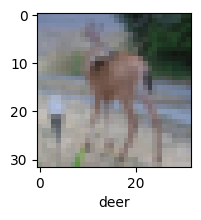

In [148]:
plotData(X_test ,y_test ,100)


In [149]:
# Comparing the results of the classifiers 
y_pred_ann = ann.predict(X_test)
y_pred_cnn = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [166]:
# Converting the predictions to class labels 
y_classes_truth = [np.argmax(e) for e in y_test]
y_classes_ann = [np.argmax(e) for e in y_pred_ann]
y_classes_cnn = [np.argmax(e) for e in y_pred_cnn]

In [176]:
def plotModelResults(X_test,y_test,y_predicted_classes, model_name):
    random_index = np.random.randint(0,len(y_predicted_classes),15)
    fig , axes = plt.subplots(nrows=3 , ncols = 5 , figsize=(9,9), subplot_kw={'xticks':[],'yticks':[]})
    for i , ax in enumerate(axes.flat):
        ax.imshow(X_test[random_index[i]])
        if y_test[random_index[i]] != y_predicted_classes[random_index[i]]:
            color='red'
        else:
            color='green'
        ax.set_title(f"True: {classes[y_test[random_index[i]]]}\n Predicted : {classes[y_predicted_classes[random_index[i]]]}" , color = color)
    plt.show()
    plt.tight_layout()

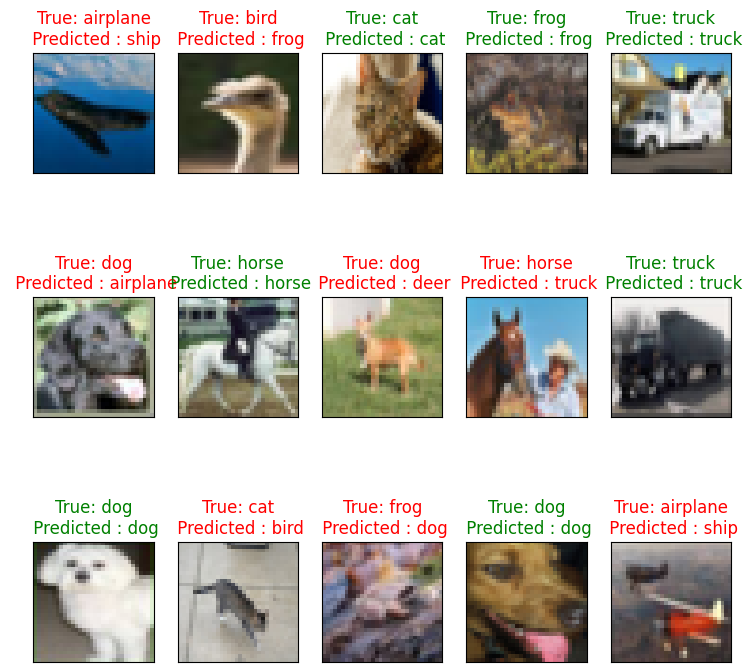

<Figure size 640x480 with 0 Axes>

In [179]:
plotModelResults(X_test,y_classes_truth, y_classes_ann,"ANN")

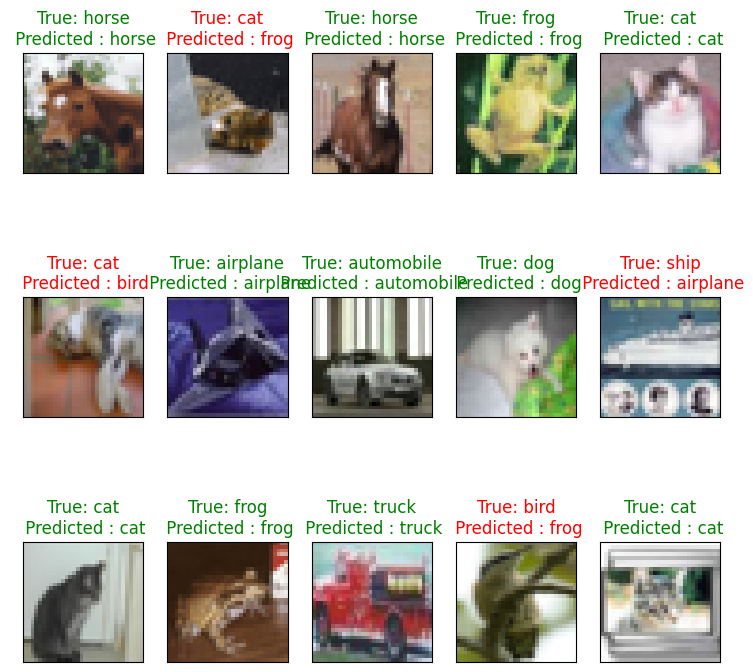

<Figure size 640x480 with 0 Axes>

In [180]:
plotModelResults(X_test,y_classes_truth, y_classes_cnn,"ANN")

In [184]:
# Saving the models
ann.save('models/ann_model.h5')
cnn.save('models/cnn_model.h5')